In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d msambare/fer2013

 85% 51.0M/60.3M [00:00<00:00, 89.4MB/s]
100% 60.3M/60.3M [00:00<00:00, 97.2MB/s]


In [48]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [18]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [20]:

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [21]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [22]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [27]:
batch_size = 32 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (224,224),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/test',
    target_size = (224,224),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [29]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
898/898 [==============================] - 399s 439ms/step - loss: 1.4352 - accuracy: 0.4485 - val_loss: 1.3167 - val_accuracy: 0.5004
Epoch 2/10
898/898 [==============================] - 388s 432ms/step - loss: 1.2250 - accuracy: 0.5345 - val_loss: 1.1814 - val_accuracy: 0.5532
Epoch 3/10
898/898 [==============================] - 389s 433ms/step - loss: 1.1467 - accuracy: 0.5695 - val_loss: 1.1433 - val_accuracy: 0.5645
Epoch 4/10
898/898 [==============================] - 389s 433ms/step - loss: 1.0852 - accuracy: 0.5926 - val_loss: 1.1220 - val_accuracy: 0.5748
Epoch 5/10
898/898 [==============================] - 390s 434ms/step - loss: 1.0348 - accuracy: 0.6135 - val_loss: 1.1110 - val_accuracy: 0.5747
Epoch 6/10
898/898 [==============================] - 388s 432ms/step - loss: 0.9953 - accuracy: 0.6275 - val_loss: 1.1015 - val_accuracy: 0.5861
Epoch 7/10
898/898 [==============================] - 388s 432ms/step - loss: 0.9595 - accuracy: 0.6446 - val_loss: 1.0819 -

In [8]:
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 

ImportError: ignored

In [ ]:
# from re import I
# batch_size = 32

# train_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     shear_range = 0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     '/content/train',
#     target_size = (224,224),
#     batch_size=batch_size,
#     class_mode='sparse'
# )

# validation_generator = train_datagen.flow_from_directory(
#     '/content/test',
#     target_size = (224,224),
#     batch_size=batch_size,
#     class_mode='sparse'
# )

In [ ]:
# model.summary()

In [ ]:
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size=(224,224)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size=(224,224)
# )

In [ ]:
# def process(image, label):
#   image = tensorflow.cast(image/255. , tensorflow.float32)
#   return image, label


# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [ ]:
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit_generator(train_generator, epochs=25, validation_data =validation_generator)

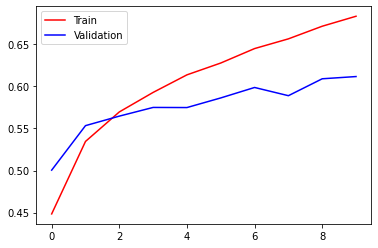

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='Validation')
plt.legend()
plt.show()

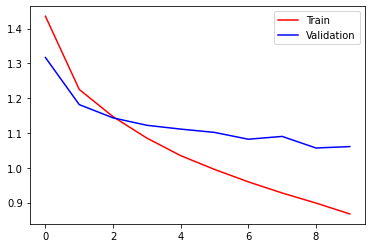

In [31]:
plt.plot(history.history['loss'], color = 'red', label='Train')
plt.plot(history.history['val_loss'], color = 'blue', label ='Validation')
plt.legend()
plt.show()

In [32]:
model.save("emo_model.h5")

In [13]:
import tensorflow as tf 
import cv2
import matplotlib.pyplot as plt




In [ ]:
model = tf.keras.models.load_model('/content/emo_model.h5')

In [50]:
frame = cv2.imread('/content/suprise.jfif')

In [51]:
frame.shape

(225, 225, 3)

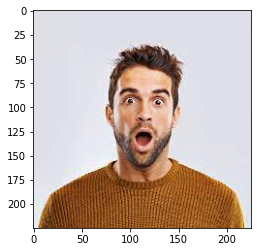

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()


In [53]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [54]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [55]:
gray.shape

(225, 225)

In [56]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for x,y,w,h in faces:

  roi_gray = gray[y:y+h , x:x+w]
  roi_color = frame[y:y+h , x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (225,0,0), 2)
  face = faceCascade.detectMultiScale(roi_gray)
  if len(face) == 0:
    print("no face found")
  else:
    for (ex, ey, eh, ew) in face:
      face_roi = roi_color[ey: ey+eh, ex:ex+ew]


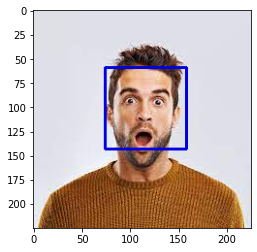

In [57]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

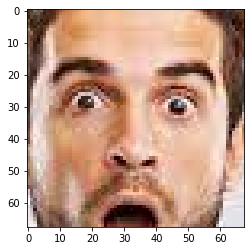

In [58]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
import numpy as np
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [60]:
prediction = model.predict(final_image)

1/1 [==============================] - 0s 20ms/step


In [61]:
prediction[0]

array([3.7448416e-03, 1.5869923e-04, 3.3232398e-02, 4.5728227e-03,
       3.8830953e-05, 1.0370121e-03, 9.5721543e-01], dtype=float32)

In [62]:
np.argmax(prediction)

6

In [77]:
import cv2

# path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_ITALIC


rectangle_bgr = (225,225,225)
img = np.zeros((500,500))

text = 'some text in a box!'

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

text_offset_x = 10
text_offset_y = img.shape[0]-25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x+text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)


cap = cv2.VideoCapture(2)

# if not cap.isOpened():
#   cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#   raise IOError("Cannot Open Webcam")

while cap.isOpened():
  ret, frame = cap.read()
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  

  faces = faceCascade.detectMultiScale(gray, 1.1, 4)
  
  for x,y,w,h in faces:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = frame[y:y+h , x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (225,0,0), 2)
    face = faceCascade.detectMultiScale(roi_gray)
    if len(face) == 0:
      print("no face found")
    else:
      for (ex, ey, eh, ew) in face:
        face_roi = roi_color[ey: ey+eh, ex:ex+ew]


  final_image = cv2.resize(face_roi, (224,224))
  final_image = np.expand_dims(final_image, axis=0)
  final_image = final_image/255.0

  font = cv2.FONT_HERSHEY_SIMPLEX

  prediction = model.predict(final_image)

  font_scale = 1.5
  font = cv2.FONT_ITALIC

  if (np.argmax(prediction)==0):
    status = 'Angry'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))


  elif (np.argmax(prediction)==1):
    status = 'Disgust'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))

  elif (np.argmax(prediction)==2):
    status = 'Fear'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))

  elif (np.argmax(prediction)==3):
    status = 'Happy'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))

  elif (np.argmax(prediction)==4):
    status = 'Neutral'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))


  elif (np.argmax(prediction)==5):
    status = 'Sad'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))

  else:
    status = 'Suprise'

    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectange(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)
    cv2.putText(frame, status(100,150),font,3,(0,0,225),2,cv2.LINE_4)
    cv2.putText(frame, (x,y), (x+w, y+h), (0,0,225))


  cv2.imshow("Face Emotion Recognition", frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break


cap.release()
cv2.destroyAllWindows()




In [76]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    cv2.imshow('webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()